In [1]:
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
import pandas as pd
from sktime.utils.plotting import plot_series
import sys
from sklearn.metrics import mean_absolute_error, r2_score
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.fbprophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
from prophet import Prophet
import src.plot_settings
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')
import seaborn as sns
#from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [2]:
#import and display data
y = pd.DataFrame(load_airline())
y.head()

,Number of airline passengers
Period,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


<Axes: xlabel='Period'>

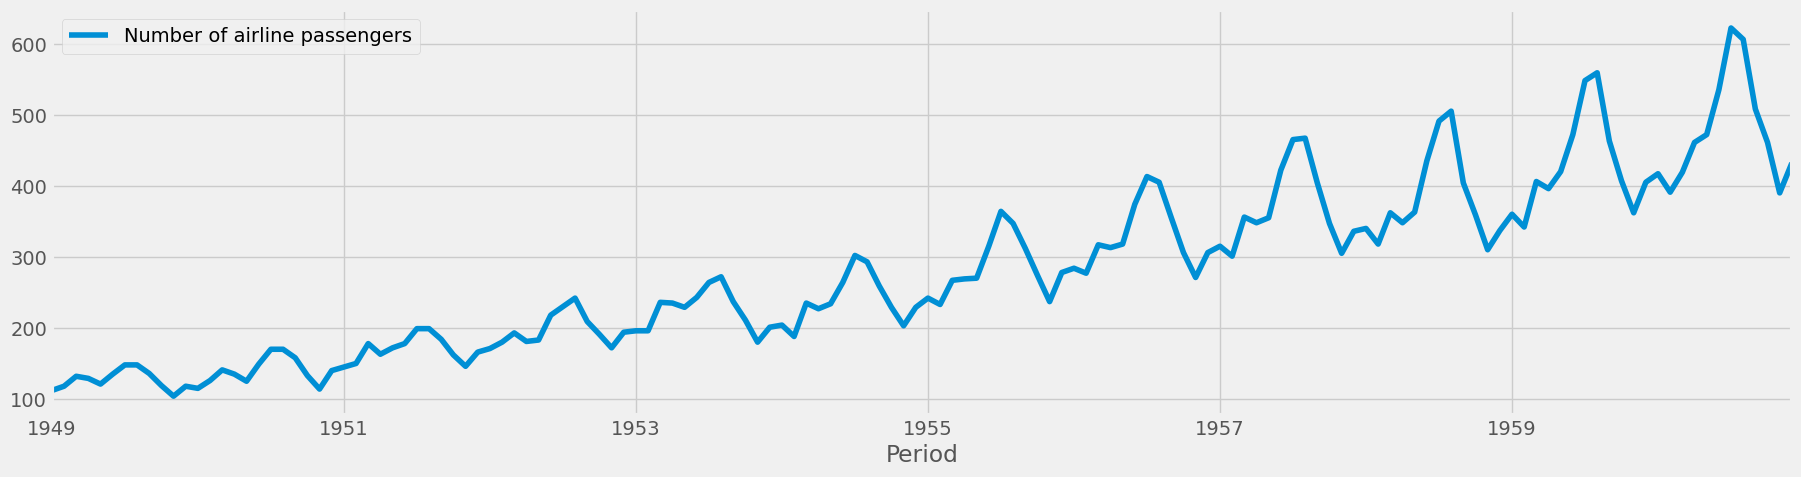

In [3]:
y.plot()

## Specify and create the model

In [4]:
#split the data into a train and test set
y_train, y_test = temporal_train_test_split(y, train_size=0.8)

#define a forecast horizon (length of time into future to predict)
fh = ForecastingHorizon(y_test.index, is_relative=False)

#define a forecaster (the model we're going to use
forecaster = ThetaForecaster(sp=12) #sp (seasonal pattern) is how often to calculate per year

forecaster.fit(y_train)

ThetaForecaster(sp=12)

In [5]:
y_pred = forecaster.predict(fh)

In [6]:
mean_absolute_percentage_error(y_test, y_pred)

6.908937018559058

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

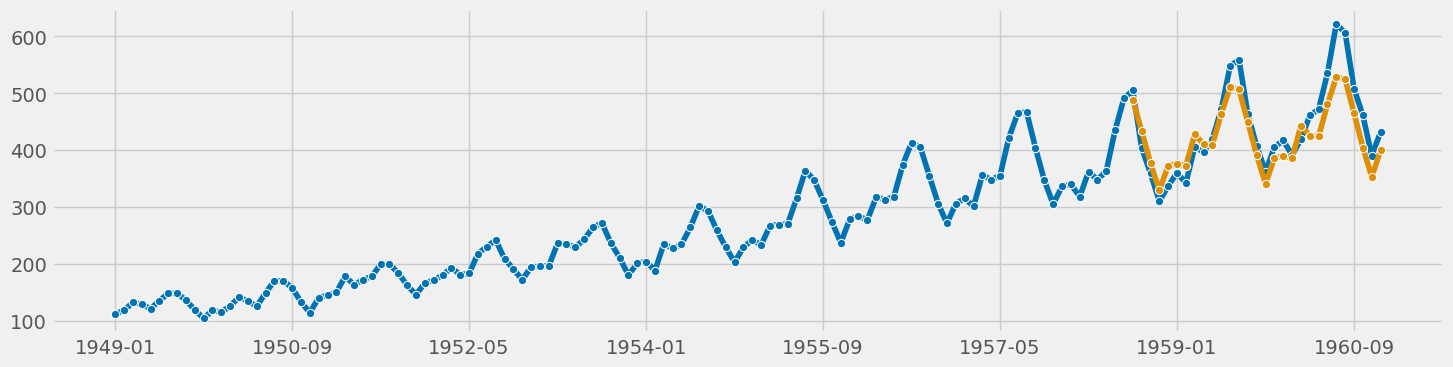

In [7]:
plot_series(y, y_pred)

# Traffic dataset

In [8]:
traffic = pd.read_csv("./data/traffic.csv", parse_dates=[0], index_col=[0])
traffic.head()

,Junction,Vehicles,ID
DateTime,,,
2015-11-01 00:00:00,1,15,20151101001
2015-11-01 01:00:00,1,13,20151101011
2015-11-01 02:00:00,1,10,20151101021
2015-11-01 03:00:00,1,7,20151101031
2015-11-01 04:00:00,1,9,20151101041


In [9]:
#pivot the data to be each Junction over time
traffic = traffic.pivot(columns="Junction", values="Vehicles")
traffic

Junction,1,2,3,4
DateTime,,,,
2015-11-01 00:00:00,15.0,6.0,9.0,NaN
2015-11-01 01:00:00,13.0,6.0,7.0,NaN
2015-11-01 02:00:00,10.0,5.0,5.0,NaN
2015-11-01 03:00:00,7.0,6.0,1.0,NaN
2015-11-01 04:00:00,9.0,7.0,2.0,NaN
...,...,...,...,...
2017-06-30 19:00:00,105.0,34.0,33.0,11.0
2017-06-30 20:00:00,96.0,35.0,31.0,30.0
2017-06-30 21:00:00,90.0,31.0,28.0,16.0


<Axes: xlabel='DateTime'>

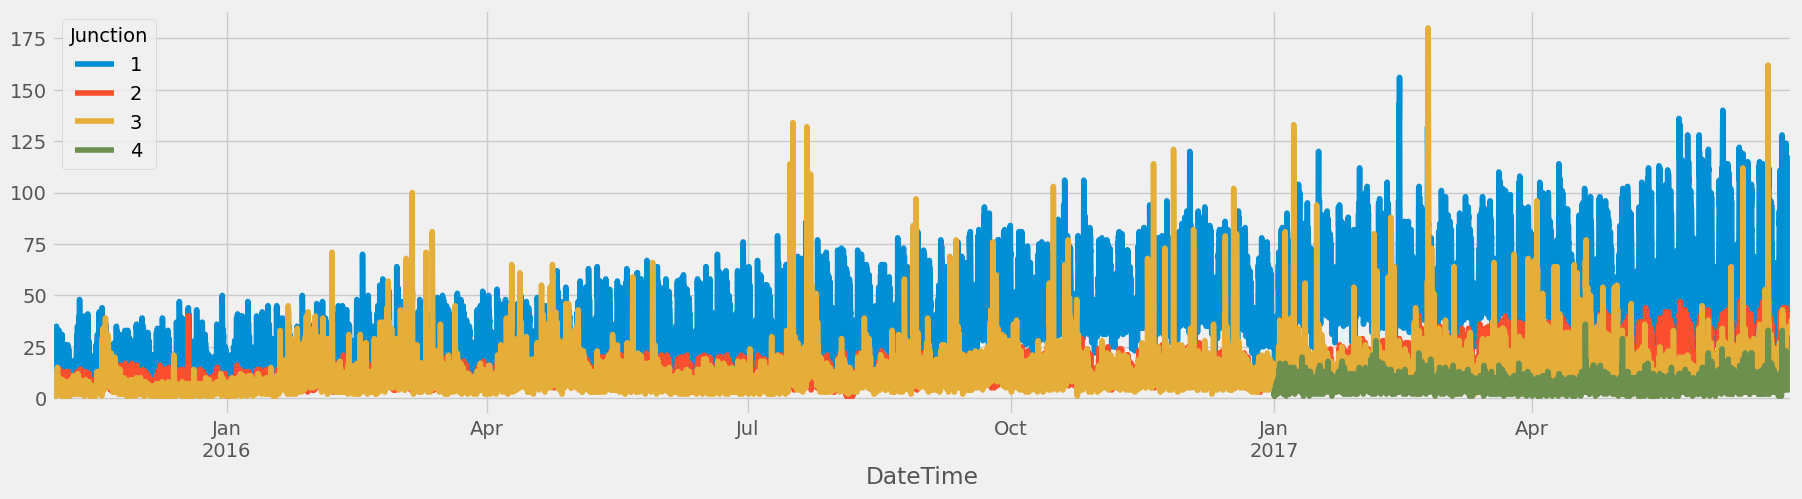

In [10]:
traffic.plot()

In [11]:
#specify the time difference between rows of data
forecast_df = traffic.resample(rule="D").sum()

In [12]:
forecaster = Prophet()

#specify horizon (days into future to predict)
horizon = 30

df = forecast_df[1]

In [26]:
#specify two datasets, one for existing data and one for predicting data
y_train = df[:-horizon]
y_test = df.tail(30)

In [27]:
forecaster.fit(y_train)

ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.

In [25]:
fh = ForecastingHorizon(y_test.index, is_relative=False)
fh

ForecastingHorizon(['2017-06-01', '2017-06-02', '2017-06-03', '2017-06-04',
               '2017-06-05', '2017-06-06', '2017-06-07', '2017-06-08',
               '2017-06-09', '2017-06-10', '2017-06-11', '2017-06-12',
               '2017-06-13', '2017-06-14', '2017-06-15', '2017-06-16',
               '2017-06-17', '2017-06-18', '2017-06-19', '2017-06-20',
               '2017-06-21', '2017-06-22', '2017-06-23', '2017-06-24',
               '2017-06-25', '2017-06-26', '2017-06-27', '2017-06-28',
               '2017-06-29', '2017-06-30'],
              dtype='datetime64[ns]', name='DateTime', freq='D', is_relative=False)

In [ ]:
y_pred = forecaster.predict(fh)

In [ ]:
#specify confidence interval
ci = forecaster.predict_interval(fh, coverage=0.9)

In [ ]:
y_true = df.tail(horizon)

In [ ]:
#calculate mean absolute error
mae = mean_absolute_error(y_true, y_pred)

In [ ]:
plt.plot(
    df.tail(horizon * 3),
    label="Actual",
    color="black",
)

plt.gca().fill_between(
    ci.index, (ci.iloc[:, 0]), color="b", alpha=0.1
)
plt.plot(y_pred, label="Predicted")
plt.ylim(bottom=0)
plt.legend()
plt.show()

# Predict the Future

In [27]:
forecaster = Prophet()
forecaster.fit(df)

last_date = df.index.max()
fh = ForecastingHorizon(
    pd.date_range(str(last_date), periods=horizon, freq="D"),
    is_relative=False,
                  )

ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.

In [ ]:
y_pred = forecaster.predict(fh)
ci = forecaster.predict_interval(fh, coverage=0.9).astype("float")

In [ ]:
plt.plot(
    df.tail(horizon * 3),
    label="Actual",
    color="black",
)

plt.gca().fill_between(
    ci.index, (ci.iloc[:, 0]), color="b", alpha=0.1
)
plt.plot(y_pred, label="Predicted")
plt.ylim(bottom=0)
plt.legend()
plt.show()

In [ ]:
def sktime_forecast(dataset, horizon, forecaster, validation=False, confidence=0.9, frequency="D"):
    """Loop over a time series dataframe, train an sktime forecasting model, and visualize the results.

    Args:
        dataset (pd.DataFrame): Input time series DataFrame with datetime index
        horizon (int): Forecast horizon
        forecaster (sktime.forecasting): Configured forecaster
        validation (bool, optional): . Defaults to False.
        confidence (float, optional): Confidence level. Defaults to 0.9.
        frequency (str, optional): . Defaults to "D".
    """
    
    # Adjust frequency
    forecast_df = dataset.resample(rule=frequency).sum()

    # Interpolate missing periods (if any)
    forecast_df = forecast_df.interpolate(method="time")

    for col in dataset.columns:

        # Use train/test split to validate forecaster
        if validation:
            df = forecast_df[col]

            y_train = df[:-horizon]
            y_test = df.tail(horizon)

            forecaster.fit(y_train)
            fh = ForecastingHorizon(y_test.index, is_relative=False)
            y_pred = forecaster.predict(fh)
            ci = forecaster.predict_interval(fh, coverage=confidence).astype("float")
            y_true = df.tail(horizon)

            mae = mean_absolute_error(y_true, y_pred)

        # Make predictions beyond the dataset
        if not validation:
            df = forecast_df[col].dropna()
            forecaster.fit(df)

            last_date = df.index.max()
            fh = ForecastingHorizon(
                pd.date_range(str(last_date), periods=horizon, freq=frequency),
                is_relative=False,
            )

            y_pred = forecaster.predict(fh)
            ci = forecaster.predict_interval(fh, coverage=confidence).astype("float")
            mae = np.nan

        # Visualize results
        plt.plot(
            df.tail(horizon * 3),
            label="Actual",
            color="black",
        )
        plt.gca().fill_between(
            ci.index, (ci.iloc[:, 0]), (ci.iloc[:, 1]), color="b", alpha=0.1
        )
        plt.plot(y_pred, label="Predicted")
        # plt.title(
        #     f"{horizon} day forecast for {col} (mae: {round(mae, 2)}, confidence: {confidence*100}%)"
        # )
        plt.ylim(bottom=0)
        # plt.legend()
        plt.grid(False)
        plt.show()

In [ ]:
forecaster = Prophet(yearly_seasonality=True, weekly_seasonality=True)
sktime_forecast(dataset=traffic, horizon=30, forecaster=forecaster, validation=False)

In [ ]:
forecaster = AutoARIMA(sp=1, suppress_warnings=True)
sktime_forecast(dataset=traffic, horizon=30, forecaster=forecaster, validation=False)

# Power Consumption

In [70]:
pjme = pd.read_csv('./data/PJME_hourly.csv',
                   index_col=[0],
                  parse_dates=[0])
pjme.index = pd.to_datetime(pjme.index, format = '%Y-%m-%d %H:%M')
pjme.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


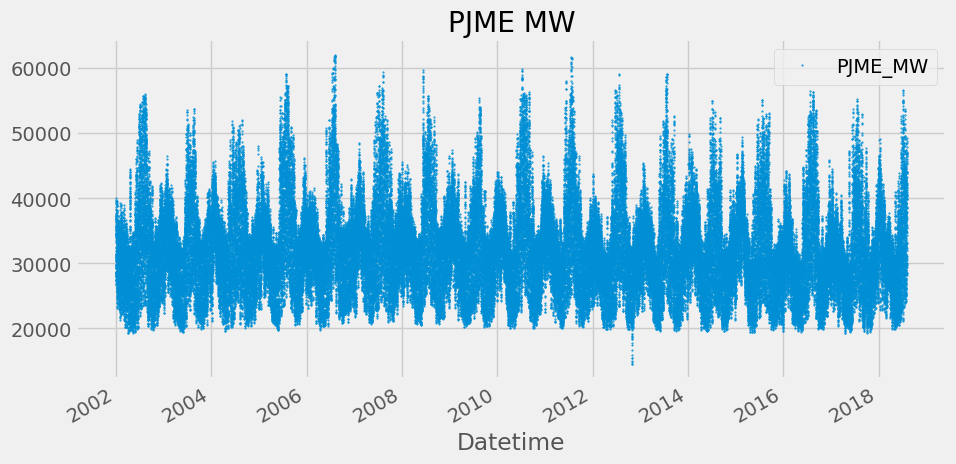

In [71]:
color_pal = sns.color_palette()
pjme.plot(style='.',
          figsize=(10, 5),
          ms=1,
          color=color_pal[0],
          title='PJME MW')
plt.show()

In [72]:
from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(categories=['Monday','Tuesday',
                                        'Wednesday',
                                        'Thursday','Friday',
                                        'Saturday','Sunday'],
                            ordered=True)

def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['weekday'] = df['date'].dt.day_name()
    df['weekday'] = df['weekday'].astype(cat_type)
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    df['date_offset'] = (df.date.dt.month*100 + df.date.dt.day - 320)%1300

    df['season'] = pd.cut(df['date_offset'], [0, 300, 602, 900, 1300], 
                          labels=['Spring', 'Summer', 'Fall', 'Winter']
                   )
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear','weekday',
           'season']]
    if label:
        y = df[label]
        return X, y
    return X

X, y = create_features(pjme, label='PJME_MW')
features_and_target = pd.concat([X, y], axis=1)

In [73]:
features_and_target.head()

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,weekday,season,PJME_MW
Datetime,,,,,,,,,,,
2002-12-31 01:00:00,1,1,4,12,2002,365,31,1,Tuesday,Winter,26498.0
2002-12-31 02:00:00,2,1,4,12,2002,365,31,1,Tuesday,Winter,25147.0
2002-12-31 03:00:00,3,1,4,12,2002,365,31,1,Tuesday,Winter,24574.0
2002-12-31 04:00:00,4,1,4,12,2002,365,31,1,Tuesday,Winter,24393.0
2002-12-31 05:00:00,5,1,4,12,2002,365,31,1,Tuesday,Winter,24860.0


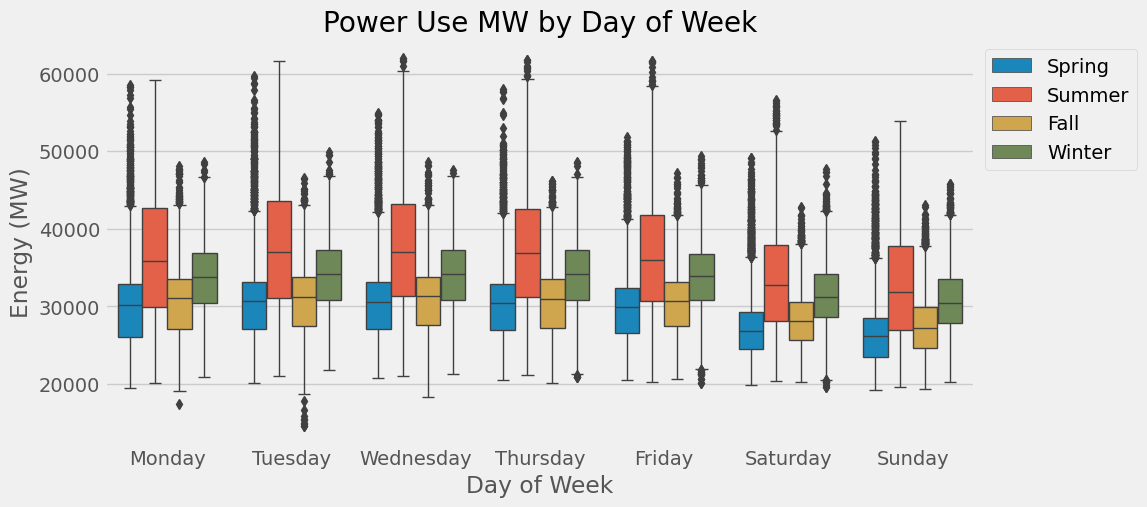

In [74]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=features_and_target.dropna(),
            x='weekday',
            y='PJME_MW',
            hue='season',
            ax=ax,
            linewidth=1)
ax.set_title('Power Use MW by Day of Week')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Energy (MW)')
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

<Axes: title={'center': 'PJM East'}, xlabel='Datetime'>

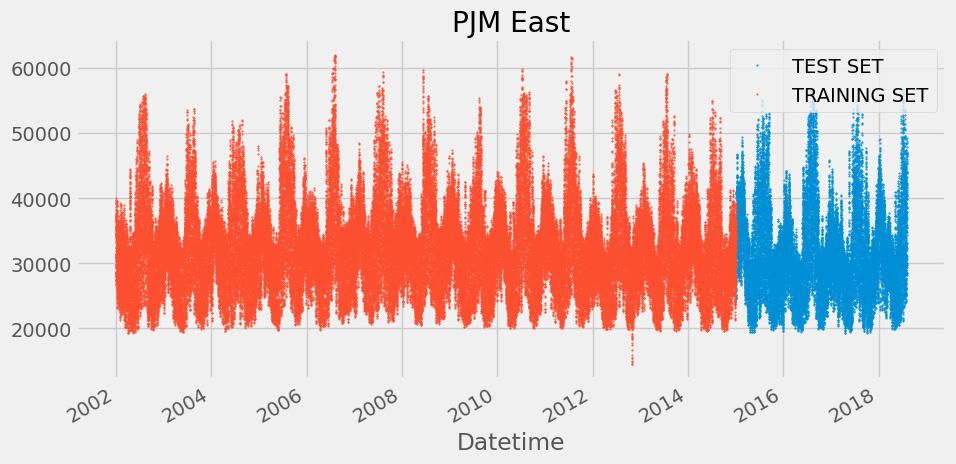

In [130]:
split_date = '1-Jan-2015'
pjme_train = pjme.loc[pjme.index <= split_date].copy()
pjme_test = pjme.loc[pjme.index > split_date].copy()
# Plot train and test so you can see where we have split
pjme_test = pjme_test.rename(columns={'PJME_MW': 'TEST SET'})
pjme_set = pjme_test.join(pjme_train.rename(columns={'PJME_MW': 'TRAINING SET'}), how='outer') 
pjme_set.plot(figsize=(10, 5), title='PJM East', style='.', ms=1)


In [131]:
# Format data for prophet model using ds and y
pjme_train_prophet = pjme_train.reset_index() \
    .rename(columns={'Datetime':'ds',
                     'PJME_MW':'y'})


In [132]:
pjme_train_prophet.head()

,ds,y
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [78]:
%%time
model = Prophet()
model.fit(pjme_train_prophet)

09:52:58 - cmdstanpy - INFO - Chain [1] start processing
09:54:54 - cmdstanpy - INFO - Chain [1] done processing


CPU times: user 7.89 s, sys: 534 ms, total: 8.42 s
Wall time: 2min 4s


In [135]:
# Predict on test set with model
pjme_test_prophet = pjme_test.reset_index() \
    .rename(columns={'Datetime':'ds',
                     'PJME_MW':'y'})

pjme_test_fcst = model.predict(pjme_test_prophet)

,TEST SET
Datetime,
2015-12-31 01:00:00,24305.0
2015-12-31 02:00:00,23156.0
2015-12-31 03:00:00,22514.0
2015-12-31 04:00:00,22330.0
2015-12-31 05:00:00,22773.0
...,...
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0


In [140]:
pjme_test_fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01 01:00:00,31219.864780,24138.847016,32632.845177,31219.864780,31219.864780,-2834.341984,-2834.341984,-2834.341984,-4430.374153,...,1281.375831,1281.375831,1281.375831,314.656338,314.656338,314.656338,0.0,0.0,0.0,28385.522796
1,2015-01-01 02:00:00,31219.828236,22442.582091,31482.000494,31219.828236,31219.828236,-4338.680198,-4338.680198,-4338.680198,-5927.270875,...,1272.621469,1272.621469,1272.621469,315.969208,315.969208,315.969208,0.0,0.0,0.0,26881.148038
2,2015-01-01 03:00:00,31219.791693,21301.900384,30247.177060,31219.791693,31219.791693,-5210.323916,-5210.323916,-5210.323916,-6790.308754,...,1262.661282,1262.661282,1262.661282,317.323556,317.323556,317.323556,0.0,0.0,0.0,26009.467777
3,2015-01-01 04:00:00,31219.755149,21170.167333,30083.948274,31219.755149,31219.755149,-5351.824691,-5351.824691,-5351.824691,-6922.162947,...,1251.618848,1251.618848,1251.618848,318.719409,318.719409,318.719409,0.0,0.0,0.0,25867.930458
4,2015-01-01 05:00:00,31219.718605,21764.975387,30925.301229,31219.718605,31219.718605,-4677.458138,-4677.458138,-4677.458138,-6237.244883,...,1239.629956,1239.629956,1239.629956,320.156790,320.156790,320.156790,0.0,0.0,0.0,26542.260467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31434,2018-08-02 20:00:00,30071.112292,-5801.097347,88693.177395,-17230.286751,77150.017840,11258.079668,11258.079668,11258.079668,4451.067464,...,1033.897582,1033.897582,1033.897582,5773.114622,5773.114622,5773.114622,0.0,0.0,0.0,41329.191960
31435,2018-08-02 21:00:00,30071.075749,-6024.968038,88082.579050,-17233.356783,77154.558652,10485.328456,10485.328456,10485.328456,3695.880939,...,1021.279658,1021.279658,1021.279658,5768.167860,5768.167860,5768.167860,0.0,0.0,0.0,40556.404205
31436,2018-08-02 22:00:00,30071.039205,-9088.390641,86210.211234,-17236.426815,77159.099463,8856.140460,8856.140460,8856.140460,2084.417840,...,1008.503035,1008.503035,1008.503035,5763.219585,5763.219585,5763.219585,0.0,0.0,0.0,38927.179665
31437,2018-08-02 23:00:00,30071.002661,-10644.980509,84101.442308,-17239.496847,77163.640275,6648.402065,6648.402065,6648.402065,-105.241448,...,995.373628,995.373628,995.373628,5758.269886,5758.269886,5758.269886,0.0,0.0,0.0,36719.404726


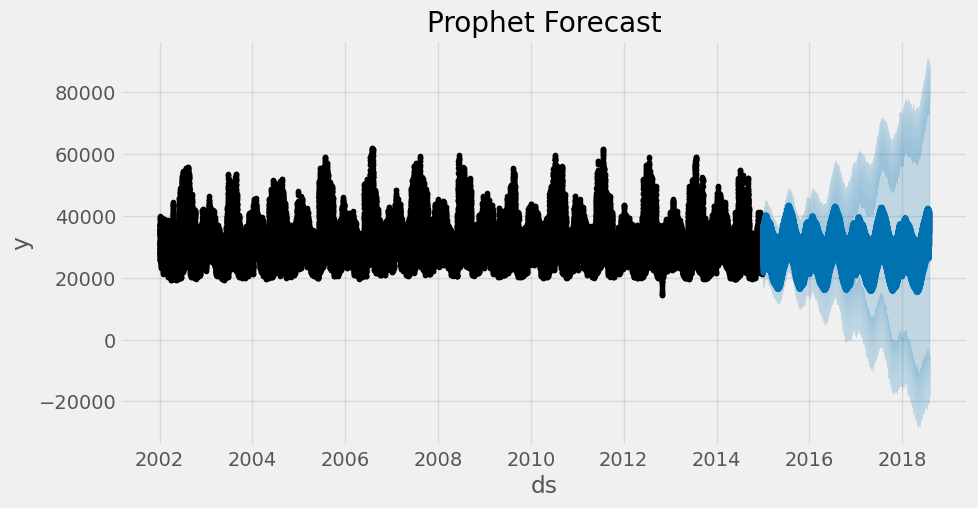

In [141]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = model.plot(pjme_test_fcst, ax=ax)
ax.set_title('Prophet Forecast')
plt.show()

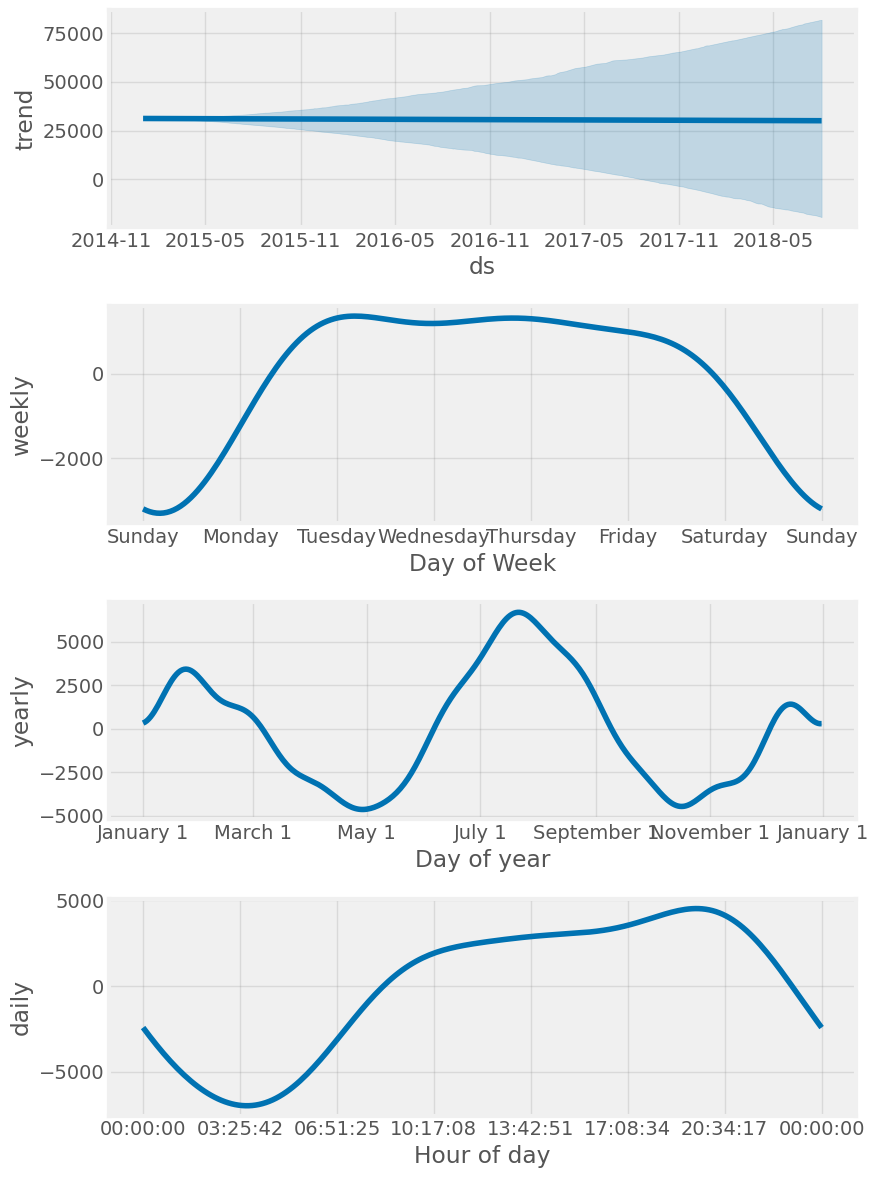

In [82]:
fig = model.plot_components(pjme_test_fcst)
plt.show()

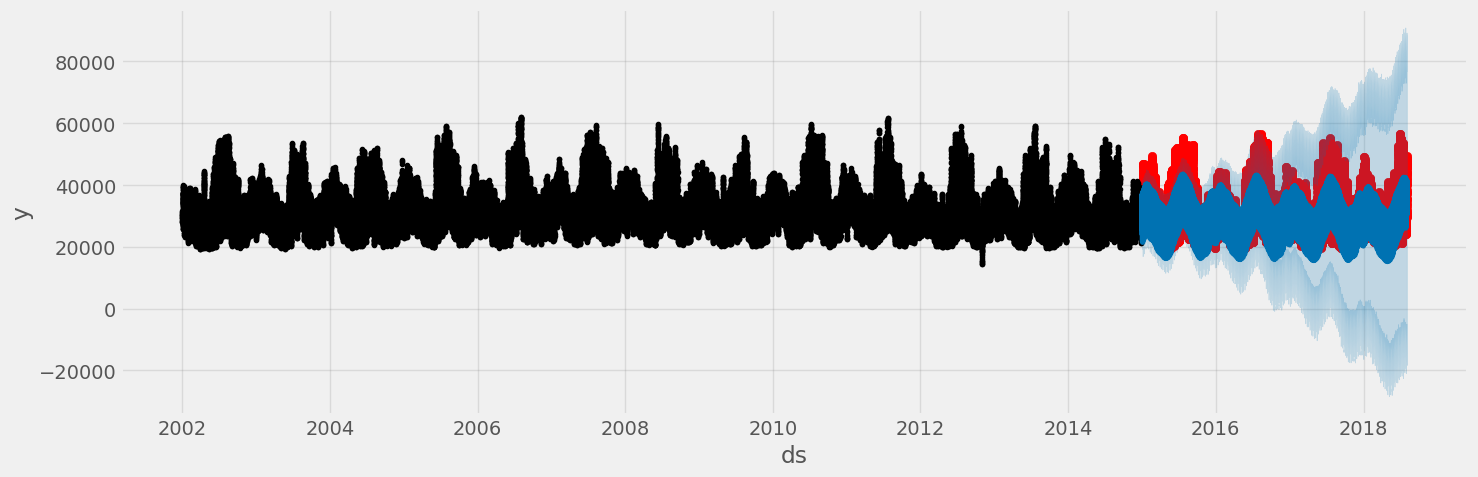

In [153]:
# Plot the forecast with the actuals
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(pjme_test.index, pjme_test['TEST SET'], color='r')
fig = model.plot(pjme_test_fcst, ax=ax)

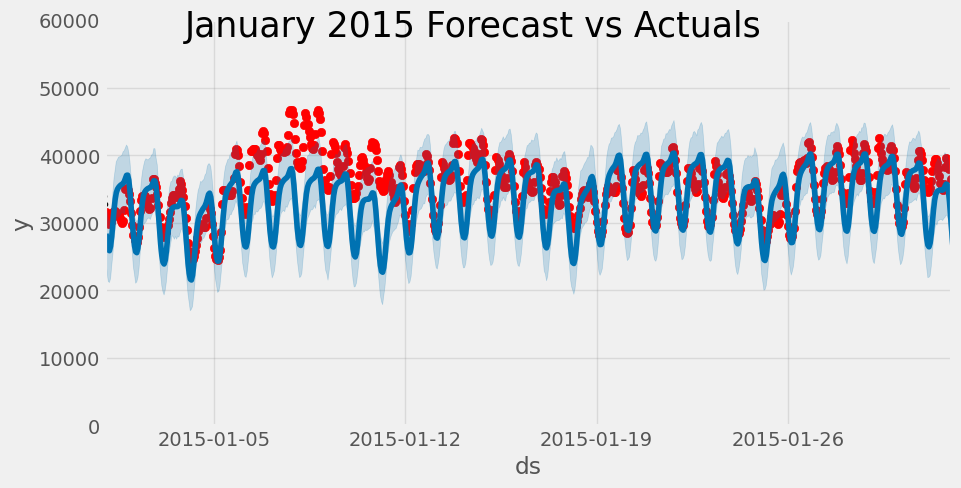

In [155]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(pjme_test.index, pjme_test['TEST SET'], color='r')
fig = model.plot(pjme_test_fcst, ax=ax)
ax.set_xbound(pd.to_datetime('2015-01-01', format = '%Y-%m-%d'), pd.to_datetime('2015-02-01', format = '%Y-%m-%d'))
ax.set_ylim(0, 60000)
plot = plt.suptitle('January 2015 Forecast vs Actuals')
plt.show()

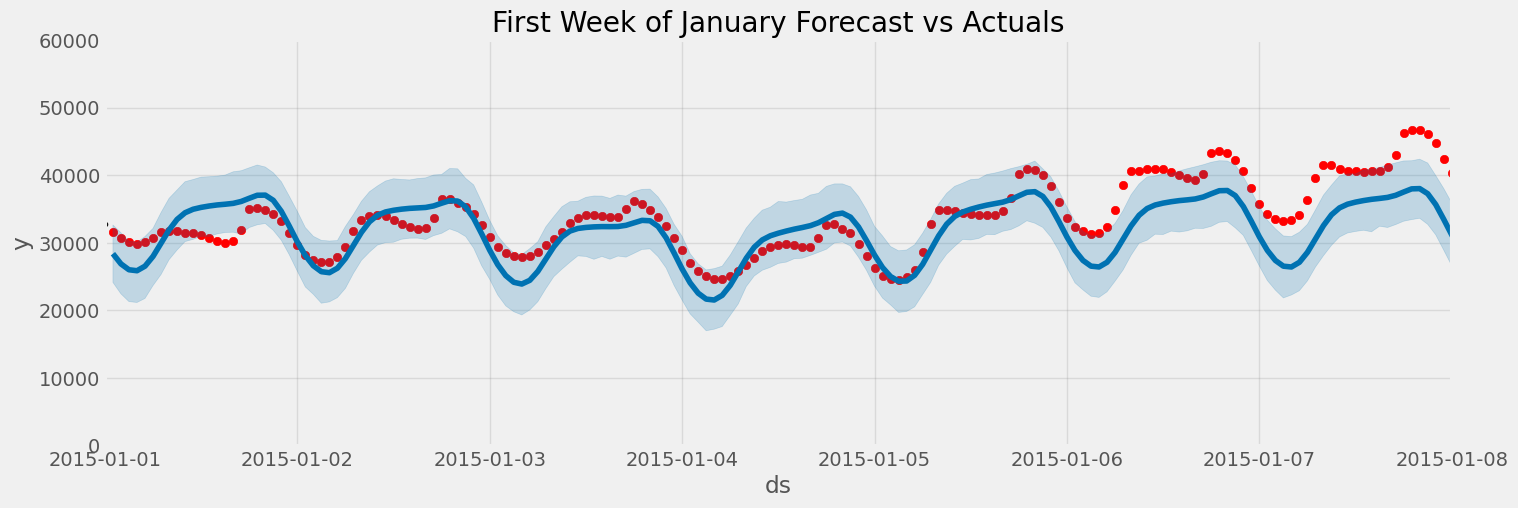

In [157]:
# Plot the forecast with the actuals
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(pjme_test.index, pjme_test['TEST SET'], color='r')
fig = model.plot(pjme_test_fcst, ax=ax)
ax.set_xbound(pd.to_datetime('2015-01-01', format = '%Y-%m-%d'), pd.to_datetime('2015-01-08', format = '%Y-%m-%d'))
ax.set_ylim(0, 60000)
ax.set_title('First Week of January Forecast vs Actuals')
plt.show()

In [158]:
np.sqrt(mean_squared_error(y_true=pjme_test['PJME_MW'],
                   y_pred=pjme_test_fcst['yhat']))

KeyError: 'PJME_MW'

In [159]:
mean_absolute_error(y_true=pjme_test['PJME_MW'],
                   y_pred=pjme_test_fcst['yhat'])

KeyError: 'PJME_MW'

In [160]:
mean_absolute_percentage_error(y_true=pjme_test['PJME_MW'],
                   y_pred=pjme_test_fcst['yhat'])

KeyError: 'PJME_MW'

In [99]:
#adding holidays
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

cal = calendar()

holidays = cal.holidays(start=pjme.index.min(),
                        end=pjme.index.max(),
                        return_name=True)

holiday_df = pd.DataFrame(data=holidays,
                          columns=['holiday'])

holiday_df = holiday_df.reset_index().rename(columns={'index':'ds'})

In [100]:
%%time
model_with_holidays = Prophet(holidays=holiday_df)
model_with_holidays.fit(pjme_train_prophet)

10:05:54 - cmdstanpy - INFO - Chain [1] start processing
10:07:39 - cmdstanpy - INFO - Chain [1] done processing


CPU times: user 9.64 s, sys: 520 ms, total: 10.2 s
Wall time: 1min 54s


In [101]:
# Predict on training set with model
pjme_test_fcst_with_hols = \
    model_with_holidays.predict(df=pjme_test_prophet)


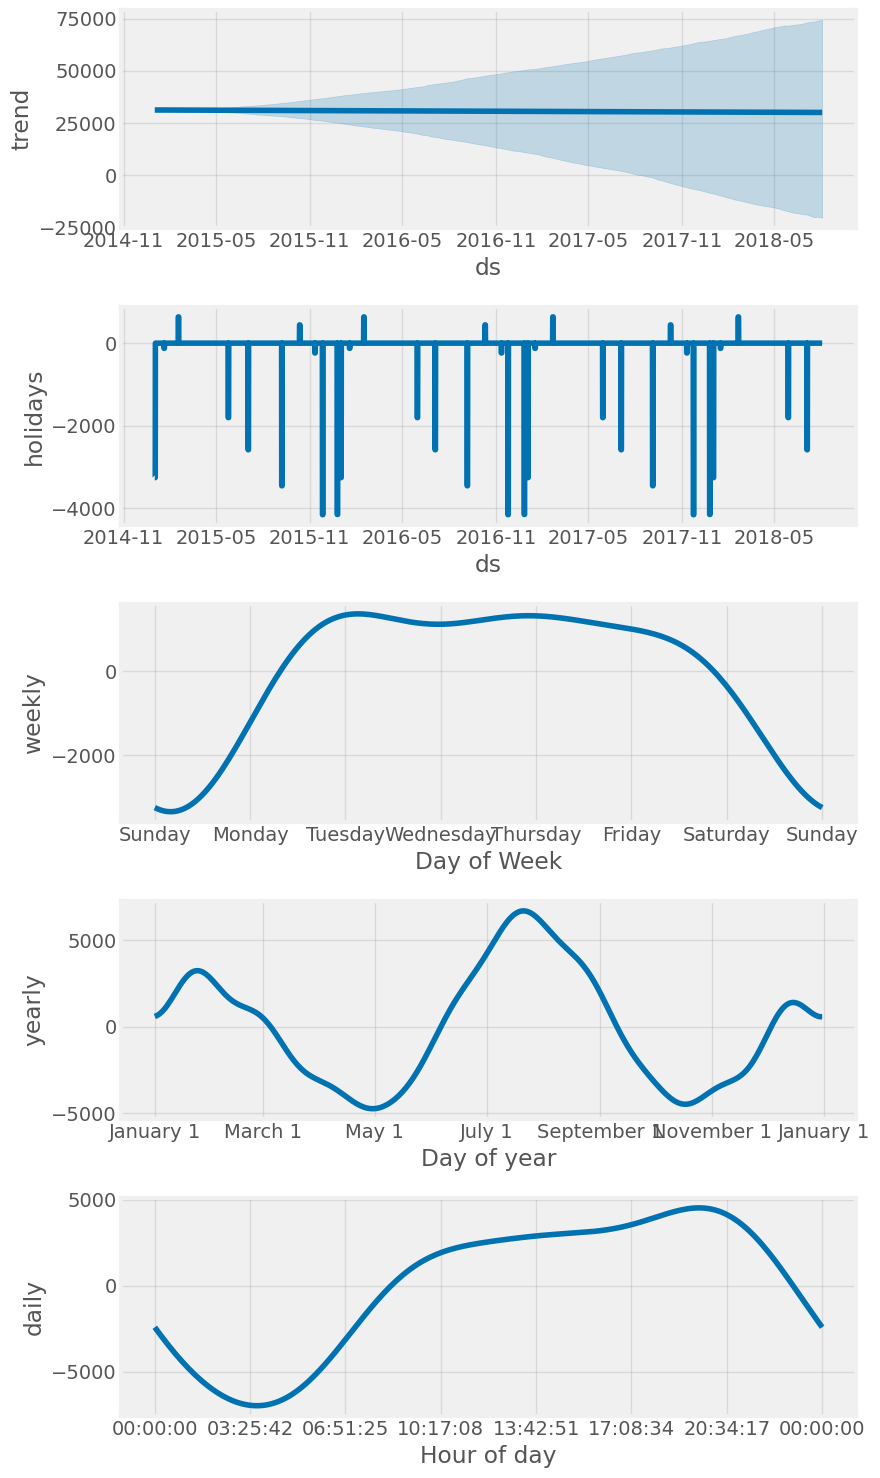

In [102]:
fig = model_with_holidays.plot_components(
    pjme_test_fcst_with_hols)
plt.show()

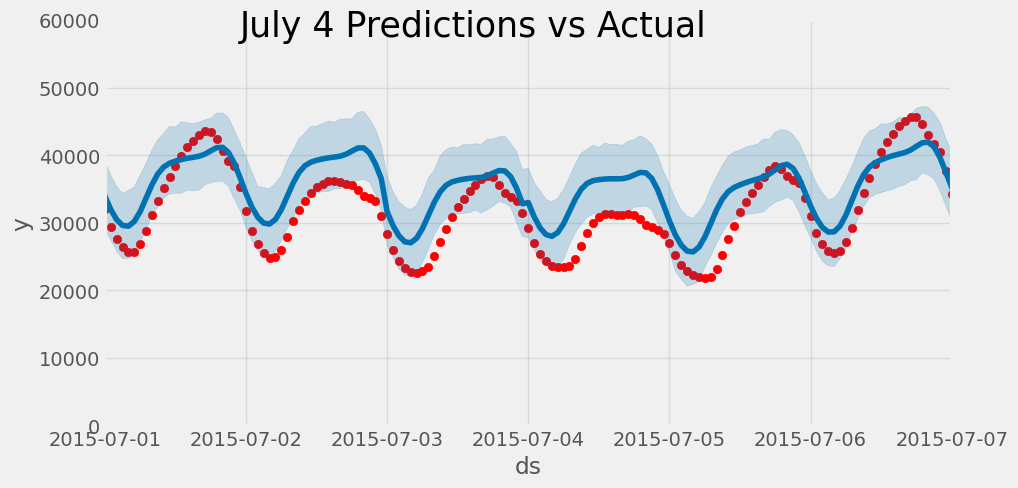

In [162]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(pjme_test.index, pjme_test['TEST SET'], color='r')
fig = model.plot(pjme_test_fcst_with_hols, ax=ax)
ax.set_xbound(pd.to_datetime('2015-07-01', format = '%Y-%m-%d'),
              pd.to_datetime('2015-07-07', format = '%Y-%m-%d'))
ax.set_ylim(0, 60000)
plot = plt.suptitle('July 4 Predictions vs Actual')

In [106]:
np.sqrt(mean_squared_error(y_true=pjme_test['PJME_MW'],
                   y_pred=pjme_test_fcst_with_hols['yhat']))

6638.16430162095

In [107]:
mean_absolute_error(y_true=pjme_test['PJME_MW'],
                   y_pred=pjme_test_fcst_with_hols['yhat'])

5199.768102205163

In [108]:
mean_absolute_percentage_error(y_true=pjme_test['PJME_MW'],
                   y_pred=pjme_test_fcst_with_hols['yhat'])

16.566669823461964

In [163]:
#Predict the future
future = model.make_future_dataframe(periods=365*24, freq='h', include_history=False)
forecast = model_with_holidays.predict(future)

In [115]:
forecast[['ds','yhat']].head()

,ds,yhat
0,2015-01-01 01:00:00,25489.943712
1,2015-01-01 02:00:00,23987.980250
2,2015-01-01 03:00:00,23118.402250
3,2015-01-01 04:00:00,22978.718356
4,2015-01-01 05:00:00,23654.627199
...,...,...
8755,2015-12-31 20:00:00,37047.723790
8756,2015-12-31 21:00:00,36277.896901
8757,2015-12-31 22:00:00,34651.646438
8758,2015-12-31 23:00:00,32446.811535


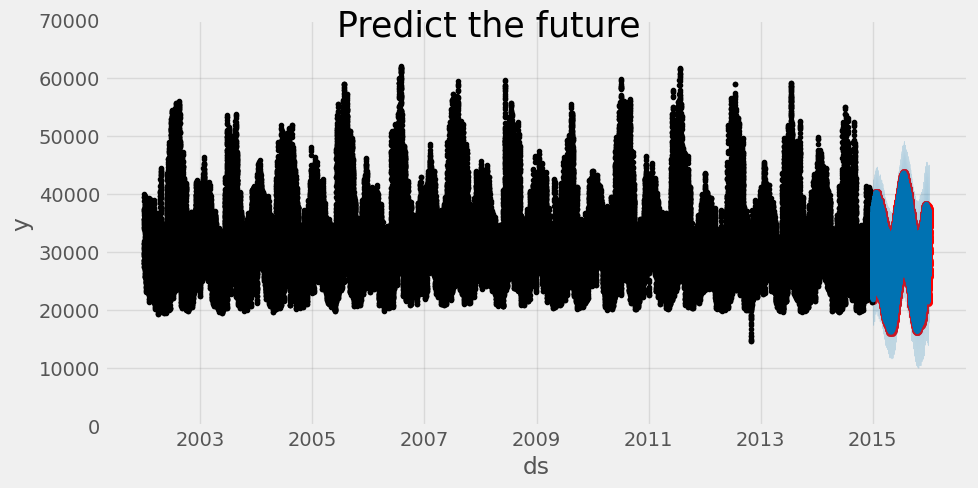

In [120]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(forecast['ds'], forecast['yhat'], color='r')
fig = model.plot(forecast, ax=ax)
ax.set_ylim(0, 70000)
plot = plt.suptitle('Predict the future')